# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


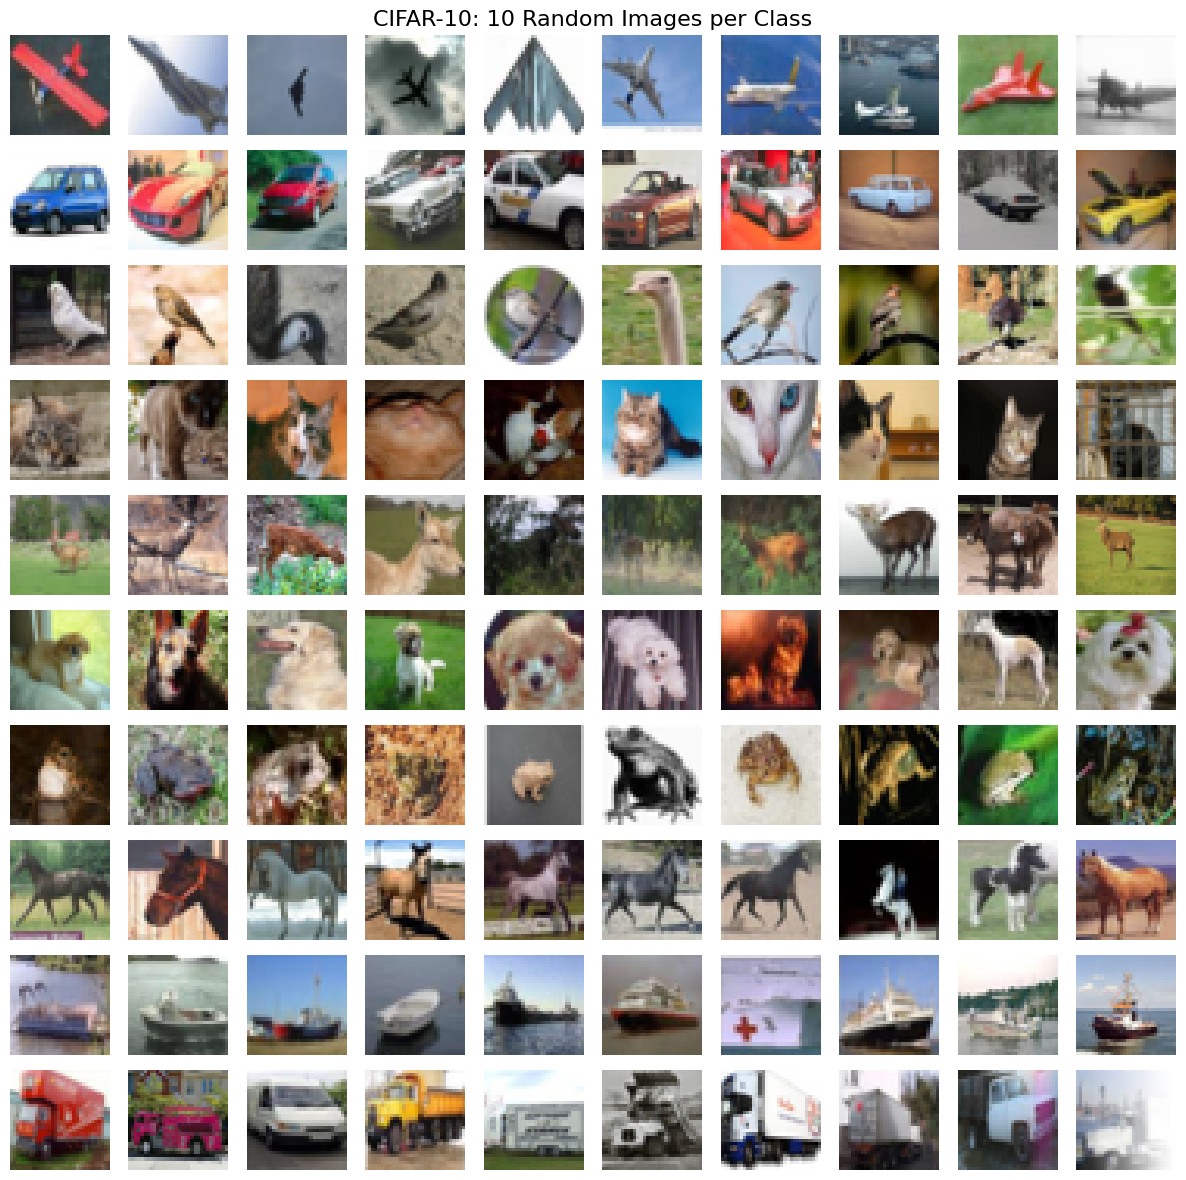

In [2]:
# CIFAR-10 class names
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# Plot 10x10 grid (10 images per class)
plt.figure(figsize=(12,12))
for i in range(10):
    idx = np.where(y_train == i)[0]
    samples = np.random.choice(idx, 10)
    for j, k in enumerate(samples):
        plt.subplot(10,10,i*10+j+1)
        plt.imshow(x_train[k])
        plt.axis('off')
        if j == 0:
            plt.ylabel(class_names[i], rotation=0, size='large', labelpad=25)
plt.suptitle("CIFAR-10: 10 Random Images per Class", fontsize=16)
plt.tight_layout()
plt.show()


In [3]:
# Convert labels to one-hot encoded form
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Normalize image pixel values (0–255 → 0–1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [5]:
from keras.backend import clear_session
clear_session()

In [7]:
from keras.backend import clear_session
clear_session()

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

simple_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3), padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

simple_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       819,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 821,206 (3.13 MB)

 Trainable params: 821,206 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [8]:
from keras.backend import clear_session
clear_session()

simple_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3), padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

simple_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       819,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 821,206 (3.13 MB)

 Trainable params: 821,206 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

*   Plot the cross entropy loss curve and the accuracy curve

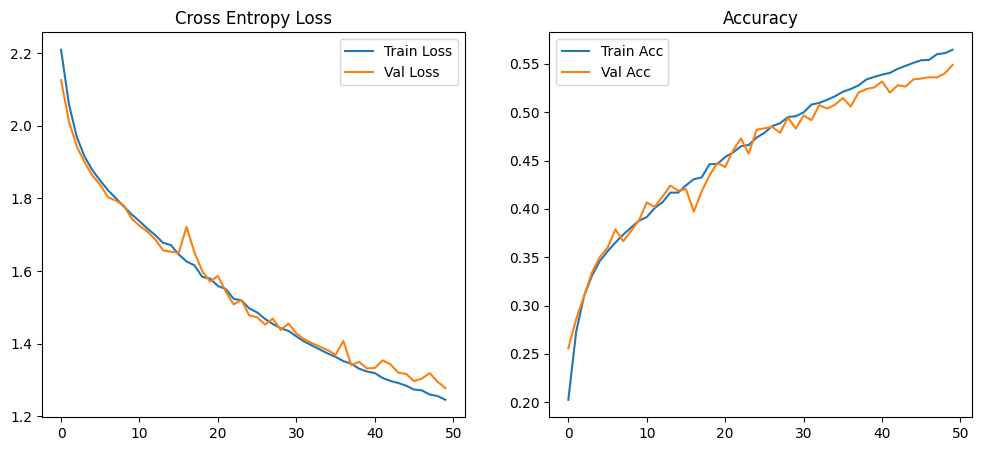

In [10]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_simple.history['loss'], label='Train Loss')
plt.plot(history_simple.history['val_loss'], label='Val Loss')
plt.legend(); plt.title('Cross Entropy Loss')

plt.subplot(1,2,2)
plt.plot(history_simple.history['accuracy'], label='Train Acc')
plt.plot(history_simple.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title('Accuracy')
plt.show()


## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [ ]:
from keras.backend import clear_session
clear_session()

In [11]:
clear_session()

vgg_model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

vgg_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [12]:
vgg_model.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    metrics=['accuracy']
)

history_vgg = vgg_model.fit(
    x_train, y_train_cat,
    validation_data=(x_test, y_test_cat),
    epochs=50,
    batch_size=512,
    verbose=2
)


Epoch 1/50
98/98 - 10s - 105ms/step - accuracy: 0.2686 - loss: 2.0332 - val_accuracy: 0.3657 - val_loss: 1.7833
Epoch 2/50
98/98 - 2s - 24ms/step - accuracy: 0.4111 - loss: 1.6637 - val_accuracy: 0.4448 - val_loss: 1.5610
Epoch 3/50
98/98 - 2s - 24ms/step - accuracy: 0.4861 - loss: 1.4564 - val_accuracy: 0.5013 - val_loss: 1.3886
Epoch 4/50
98/98 - 2s - 24ms/step - accuracy: 0.5364 - loss: 1.3104 - val_accuracy: 0.5365 - val_loss: 1.3256
Epoch 5/50
98/98 - 3s - 28ms/step - accuracy: 0.5696 - loss: 1.2188 - val_accuracy: 0.5791 - val_loss: 1.1911
Epoch 6/50
98/98 - 3s - 27ms/step - accuracy: 0.5980 - loss: 1.1455 - val_accuracy: 0.5946 - val_loss: 1.1395
Epoch 7/50
98/98 - 2s - 24ms/step - accuracy: 0.6217 - loss: 1.0777 - val_accuracy: 0.5997 - val_loss: 1.1313
Epoch 8/50
98/98 - 2s - 24ms/step - accuracy: 0.6428 - loss: 1.0208 - val_accuracy: 0.6088 - val_loss: 1.1083
Epoch 9/50
98/98 - 2s - 25ms/step - accuracy: 0.6631 - loss: 0.9626 - val_accuracy: 0.6299 - val_loss: 1.0652
Epoch 10

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


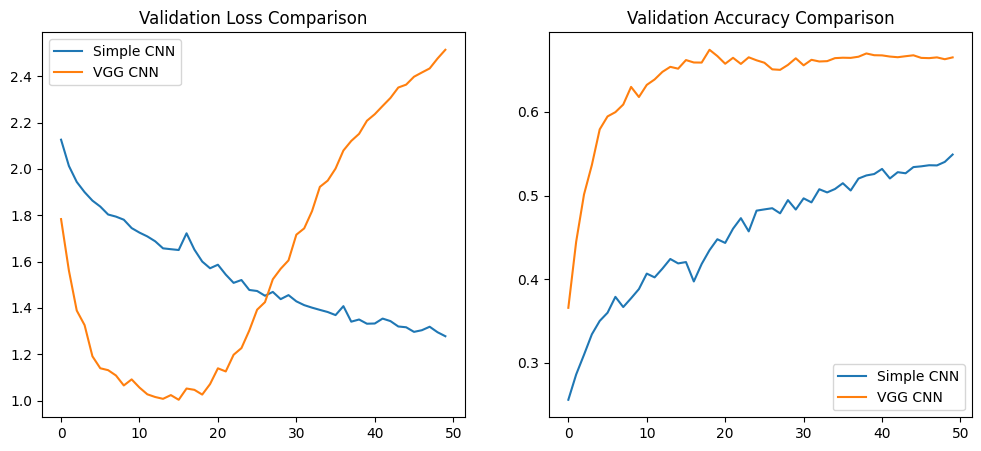

In [13]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_simple.history['val_loss'], label='Simple CNN')
plt.plot(history_vgg.history['val_loss'], label='VGG CNN')
plt.legend(); plt.title('Validation Loss Comparison')

plt.subplot(1,2,2)
plt.plot(history_simple.history['val_accuracy'], label='Simple CNN')
plt.plot(history_vgg.history['val_accuracy'], label='VGG CNN')
plt.legend(); plt.title('Validation Accuracy Comparison')
plt.show()


**Comment on the observation**

*(Double-click or enter to edit)*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


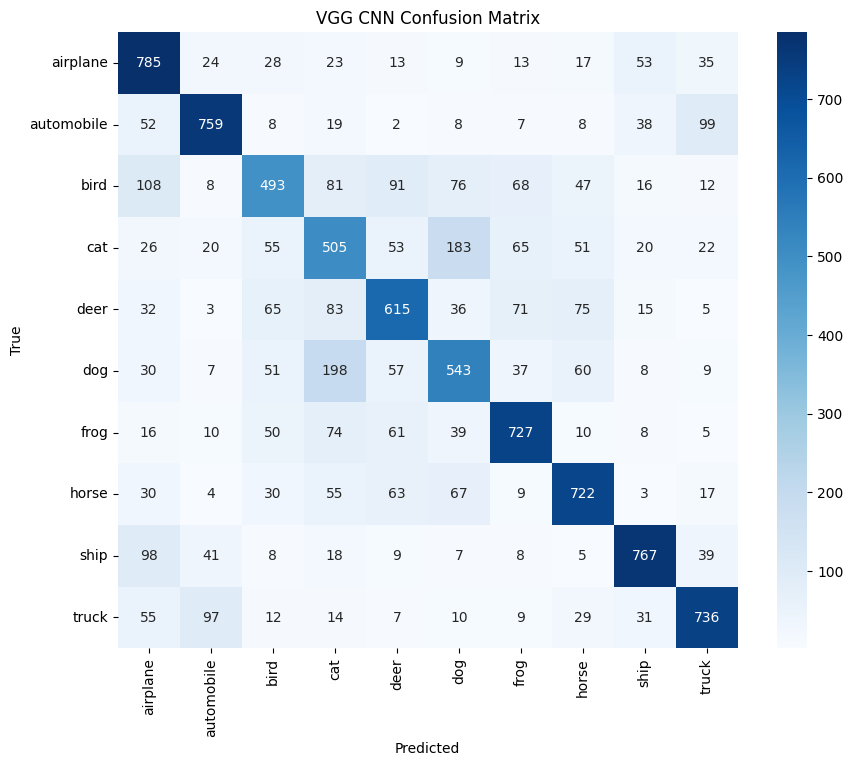

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict on test data
y_pred = vgg_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.flatten()

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('VGG CNN Confusion Matrix')
plt.show()

**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [16]:
test_loss, test_acc = vgg_model.evaluate(x_test, y_test_cat, verbose=0)
print(f"✅ Test Accuracy: {test_acc*100:.2f}%")


✅ Test Accuracy: 66.52%


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [ ]:
from keras.backend import clear_session
clear_session()

In [17]:
from tensorflow.keras.layers import Input

clear_session()

deep_vgg = Sequential([
    # Block 1
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(64,64,3)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),

    # Block 2
    Conv2D(128, (3,3), activation='relu', padding='same'),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),

    # Block 3
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

deep_vgg.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [18]:
from tensorflow.image import resize

x_train_resized = np.array([resize(img, (64,64)).numpy() for img in x_train])
x_test_resized = np.array([resize(img, (64,64)).numpy() for img in x_test])


In [19]:
deep_vgg.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    metrics=['accuracy']
)

history_deep = deep_vgg.fit(
    x_train_resized, y_train_cat,
    validation_data=(x_test_resized, y_test_cat),
    epochs=10,
    batch_size=512,
    verbose=2
)


Epoch 1/10
98/98 - 117s - 1s/step - accuracy: 0.1949 - loss: 2.1639 - val_accuracy: 0.3365 - val_loss: 1.8849
Epoch 2/10
98/98 - 37s - 377ms/step - accuracy: 0.3698 - loss: 1.7671 - val_accuracy: 0.4307 - val_loss: 1.6027
Epoch 3/10
98/98 - 37s - 376ms/step - accuracy: 0.4623 - loss: 1.4984 - val_accuracy: 0.5032 - val_loss: 1.4127
Epoch 4/10
98/98 - 37s - 377ms/step - accuracy: 0.5263 - loss: 1.3276 - val_accuracy: 0.5329 - val_loss: 1.3392
Epoch 5/10
98/98 - 37s - 377ms/step - accuracy: 0.5753 - loss: 1.1990 - val_accuracy: 0.5744 - val_loss: 1.2037
Epoch 6/10
98/98 - 37s - 377ms/step - accuracy: 0.6145 - loss: 1.0905 - val_accuracy: 0.6109 - val_loss: 1.1102
Epoch 7/10
98/98 - 37s - 378ms/step - accuracy: 0.6609 - loss: 0.9729 - val_accuracy: 0.6293 - val_loss: 1.0499
Epoch 8/10
98/98 - 37s - 377ms/step - accuracy: 0.6968 - loss: 0.8680 - val_accuracy: 0.6540 - val_loss: 1.0051
Epoch 9/10
98/98 - 37s - 377ms/step - accuracy: 0.7332 - loss: 0.7626 - val_accuracy: 0.6483 - val_loss: 1

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step


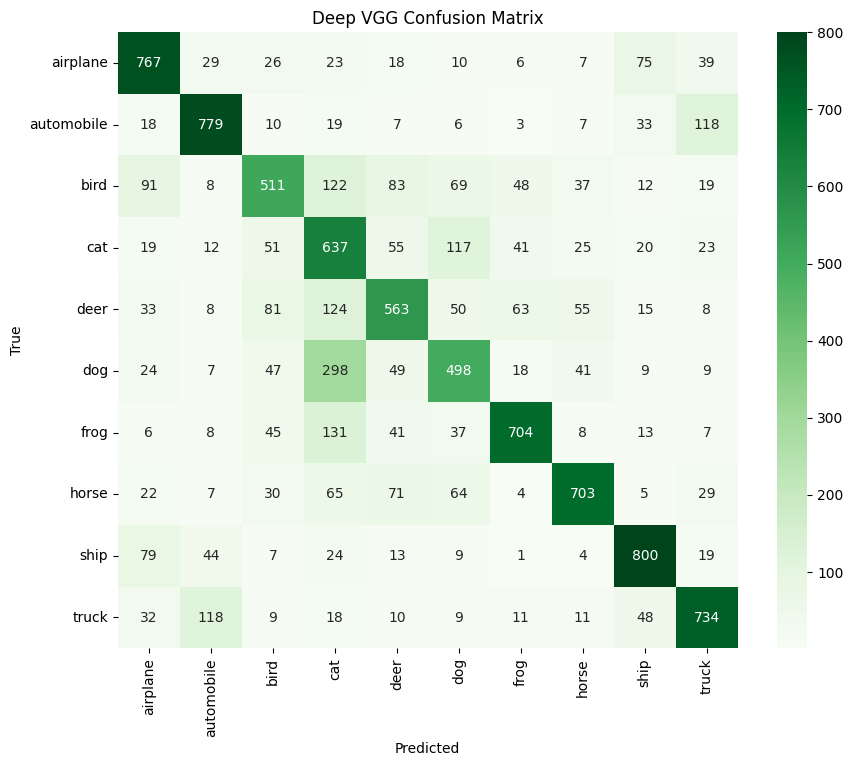

In [20]:
y_pred_deep = deep_vgg.predict(x_test_resized)
y_pred_classes = np.argmax(y_pred_deep, axis=1)
cm = confusion_matrix(y_test.flatten(), y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Deep VGG Confusion Matrix')
plt.show()


# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

Activation functions introduce non-linearity into a neural network, enabling it to learn and model complex relationships in data.
Without them, the network would behave like a simple linear model, no matter how many layers it has.
They help neurons decide which signals to activate or suppress, allowing deep networks to extract abstract and meaningful features.

_

2 - Key Differences between sigmoid and softmax:

Sigmoid outputs a probability value between 0 and 1 for each neuron independently — best for binary classification.

Softmax converts multiple output values into probabilities that sum to 1 — best for multi-class classification.

Sigmoid treats each class independently, while Softmax enforces competition between classes (only one dominant output).

_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:

Binary crossentropy is used for two-class problems (output layer: 1 neuron with sigmoid activation).

Categorical crossentropy is used for multi-class problems (output layer: multiple neurons with softmax activation).

Binary crossentropy compares a single predicted probability with a single target label,
while categorical crossentropy compares a probability distribution across all classes with the true one-hot encoded label.
_
